**Relevant reading for this problem set**:
<a href="https://moderndive.com/10-inference-for-regression.html"
target="_blank">ModernDive Chapter 10: Inference for Regression</a>.

## Background

For this problem set you will apply statistical inference to a linear
modeling and explore methods to check the required conditions. To start
we will build a model using data from the `palmerpenguins` package. The
`penguins` data contains size measurements for three penguin species
observed on three islands in the Palmer Archipelago, Antarctica.

First we will start with our typical exploratory data analysis and then
build our linear model. From there we will use our new skills to make
inferences about our regression model and check the necessary
conditions.

### Load packages

We will read the data in from the`palmerpenguins` package, explore the
data using the `dplyr` package and visualize it using the `ggplot2`
package. The `moderndive` package includes some nice functions to show
regression model outputs and finally use the `infer` package for “tidy”
and transparent statistical inference.

In [10]:
library('moderndive')
library('infer')
library('palmerpenguins')
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tibble       3.2.1
✔ dplyr        1.1.4     ✔ tidyr        1.3.1
✔ ggplot2      3.5.1     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



### The data

In [11]:
pen = penguins |> 
  filter(!is.na(flipper_length_mm))

pen |> glimpse()

Rows: 342
Columns: 7
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42.0…
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2…
$ flipper_length_mm <int> 181, 186, 195, 193, 190, 181, 195, 193, 190, 186, 18…
$ body_mass_g       <int> 3750, 3800, 3250, 3450, 3650, 3625, 4675, 3475, 4250…
$ sex               <fct> male, female, female, female, male, female, male, NA…


Take a moment to look at the data using `glimpse` and `head`. The dataset contains 8
variables. You can read more about the variables by placing your cursor in `penguins` and 
looking at the `Contextual Help` tool.

For our lab we will focus on four variables, the explanatory variables
include:

-   `flipper_length_mm` - an integer denoting flipper length
    (millimeters)
-   `bill_length_mm` - a number denoting bill length (millimeters)
-   `species`- denotes penguin species (Adélie, Chinstrap and Gentoo)

The outcome variable `body_mass_g` is an integer denoting body mass
(grams).

### Visualization

We will start by investigating the relationship between
‘flipper_length_mm’ and ‘body_mass_g’.

`geom_smooth()` using formula = 'y ~ x'


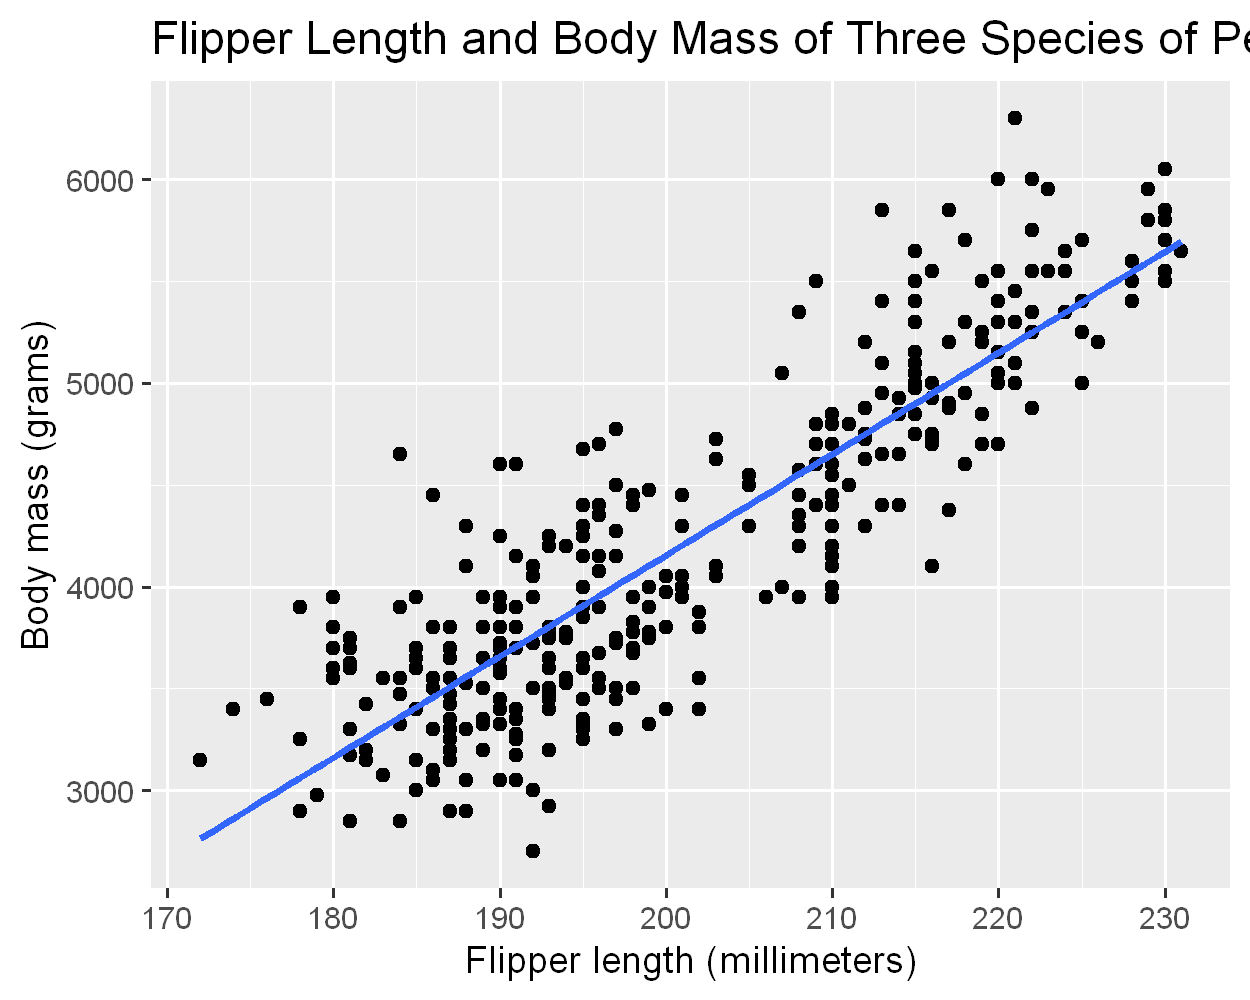

In [5]:
ggplot(data = pen, aes(y = body_mass_g, x = flipper_length_mm)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Flipper length (millimeters)", 
       y = "Body mass (grams)", 
       title = "Flipper Length and Body Mass of Three Species of Penguins") 

***
## Question 1

Does the relationship appear to be positive or negative? Does it look to
be reasonably linear?

**Answer:** The relationship appears to positively correlated and reasonably linear.

## Create a linear regression model

Here we use the [standard error](https://moderndive.com/10-inference-for-regression.html#regression-se) to calculate a confidence interval. Later we will use the bootstrap resampling technique
that does not rely on distrubutional assumptions.

In [25]:
mod = linear_reg() |> set_engine('lm')

pen_model = mod |> fit(body_mass_g ~ flipper_length_mm, data = pen)

tidy(pen_model) |> mutate(lower_ci = estimate - 1.96 * std.error, upper_ci = estimate + 1.96 * std.error)

term,estimate,std.error,statistic,p.value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5780.83136,305.814504,-18.90306,5.587301e-55,-6380.22779,-5181.43493
flipper_length_mm,49.68557,1.518404,32.72223,4.370681e-107,46.70949,52.66164


***
## Question 2

Using our shorthand interpretation for confidence intervals and the
regression table, write a sentence interpreting the 95% confidence
interval for $\beta_1$?

**Answer:**



The 95% confidence interval for $\beta_1$ indicates the range of plausible values for the slope of the regression line. If the interval does not include 0, it suggests that there is a statistically significant relationship between `flipper_length_mm` and `body_mass_g`. Based on the regression table, the confidence interval provides evidence that the slope is positive, meaning that as `flipper_length_mm` increases, `body_mass_g` also tends to increase. This aligns with the observed positive and linear relationship in the scatterplot.



***
## Question 3

Recall that the test statistic and $p$-value correspond to the
hypothesis test:

$$
\begin{aligned} 
H_0:& \, \beta_{1} = 0 \\ 
H_A:& \, \beta_{1} \neq 0 
\end{aligned}
$$

Write up the results & conclusions for this hypothesis test.

**Answer:**

Based on the hypothesis test, the null hypothesis is tested against the alternative hypothesis. The p-value from the regression table is near 0, which indicates strong evidence against the null hypothesis. Therefore, we reject H_0 and conclude that there is a statistically significant relationship between `flipper_length_mm` and `body_mass_g`. This result aligns with the observed positive and linear relationship in the scatterplot.


***
## Question 4

You may remember that this hypothesis test is only valid if certain
“conditions for inference for regression” are met. Let’s take a closer
look those conditions.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

## Linearity of relationship between variables

**4a) ** This was analyzed in question 1. Did you say that the
relationship between `flipper_length_mm` and `body_mass_g` appears to be
linear?

**Answer:**

Yes. Earlier I did state the relationship appears reasonably linear, which matches condition 1 of inference for regression.



## Independence of the residuals

The observations in our data must be independent of one another. In this
data, we can not be sure this is case, for example, some of the penguins
included may be related (siblings, parents). We are not given enough
information to verify this condition has been met.

## Normality of the residuals

The third condition is that the residuals should follow a Normal
distribution centered 0. To check for normality, create a histogram.

The code to get the residuals is given.

In [28]:
regression_points = augment(pen_model, new_data = pen)

regression_points |> head()

.pred,.resid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
3212.256,537.743839,Adelie,Torgersen,39.1,18.7,181,3750,male
3460.684,339.316007,Adelie,Torgersen,39.5,17.4,186,3800,female
3907.854,-657.854091,Adelie,Torgersen,40.3,18.0,195,3250,female
3808.483,-358.482958,Adelie,Torgersen,36.7,19.3,193,3450,female
3659.426,-9.426259,Adelie,Torgersen,39.3,20.6,190,3650,male
3212.256,412.743839,Adelie,Torgersen,38.9,17.8,181,3625,female


**4b)**

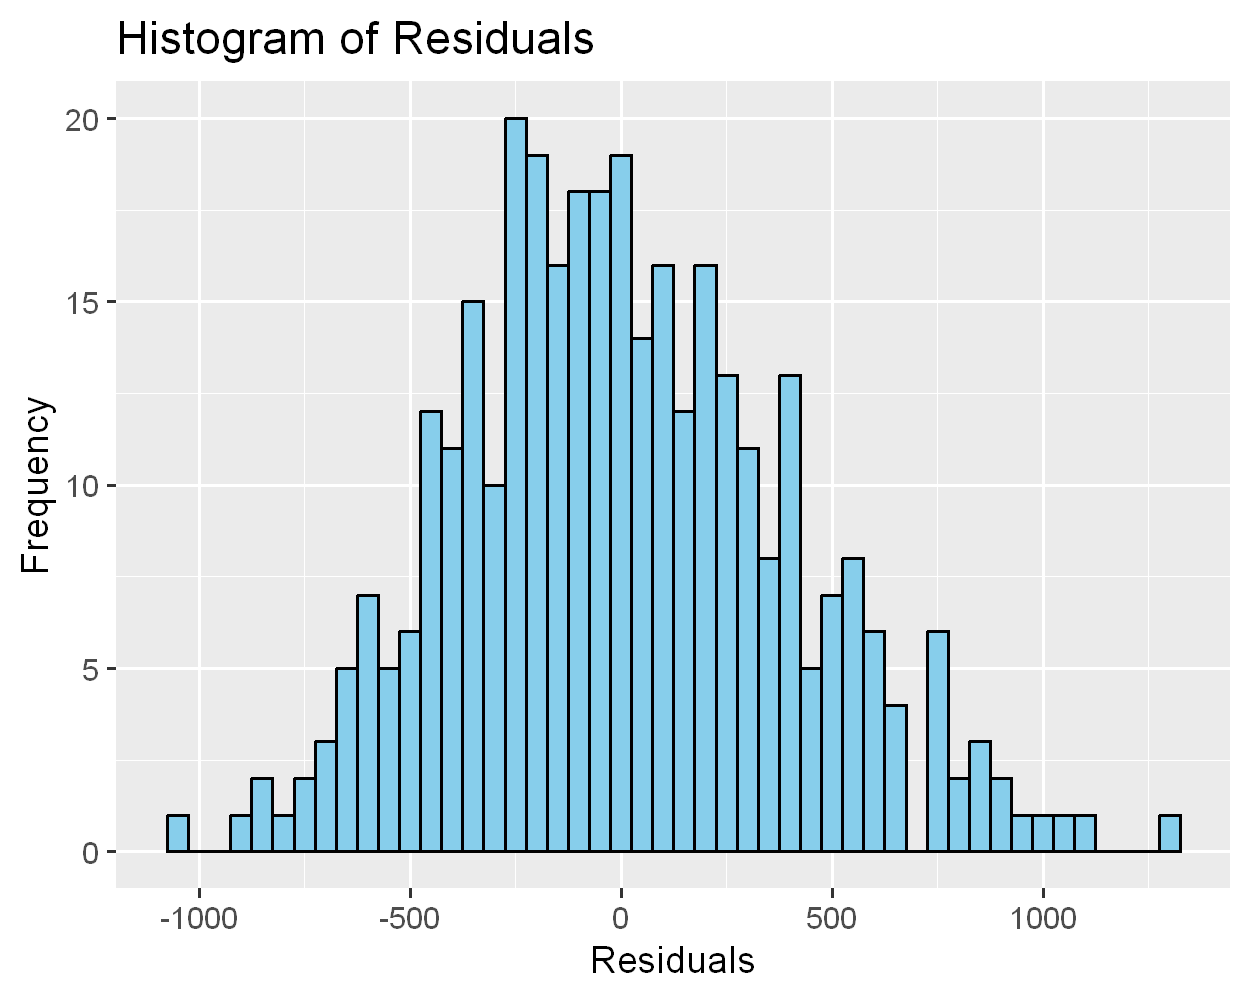

In [8]:
#Add code for the histogram.
ggplot(regression_points, aes(x = .resid)) +
    geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
    labs(x = "Residuals", y = "Frequency", title = "Histogram of Residuals")



**4c)** Does this model meet the normality of residuals condition?

**Answer:**

**Yes. I would argue that the residual histogram is reasonably, normally distributed around 0.**



## Equality of variance of the residuals

The final condition says that the residual should exhibit equal variace
across all of the values of the explanatory variable.

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis. Does this model meet the Normality of Residuals
condition?

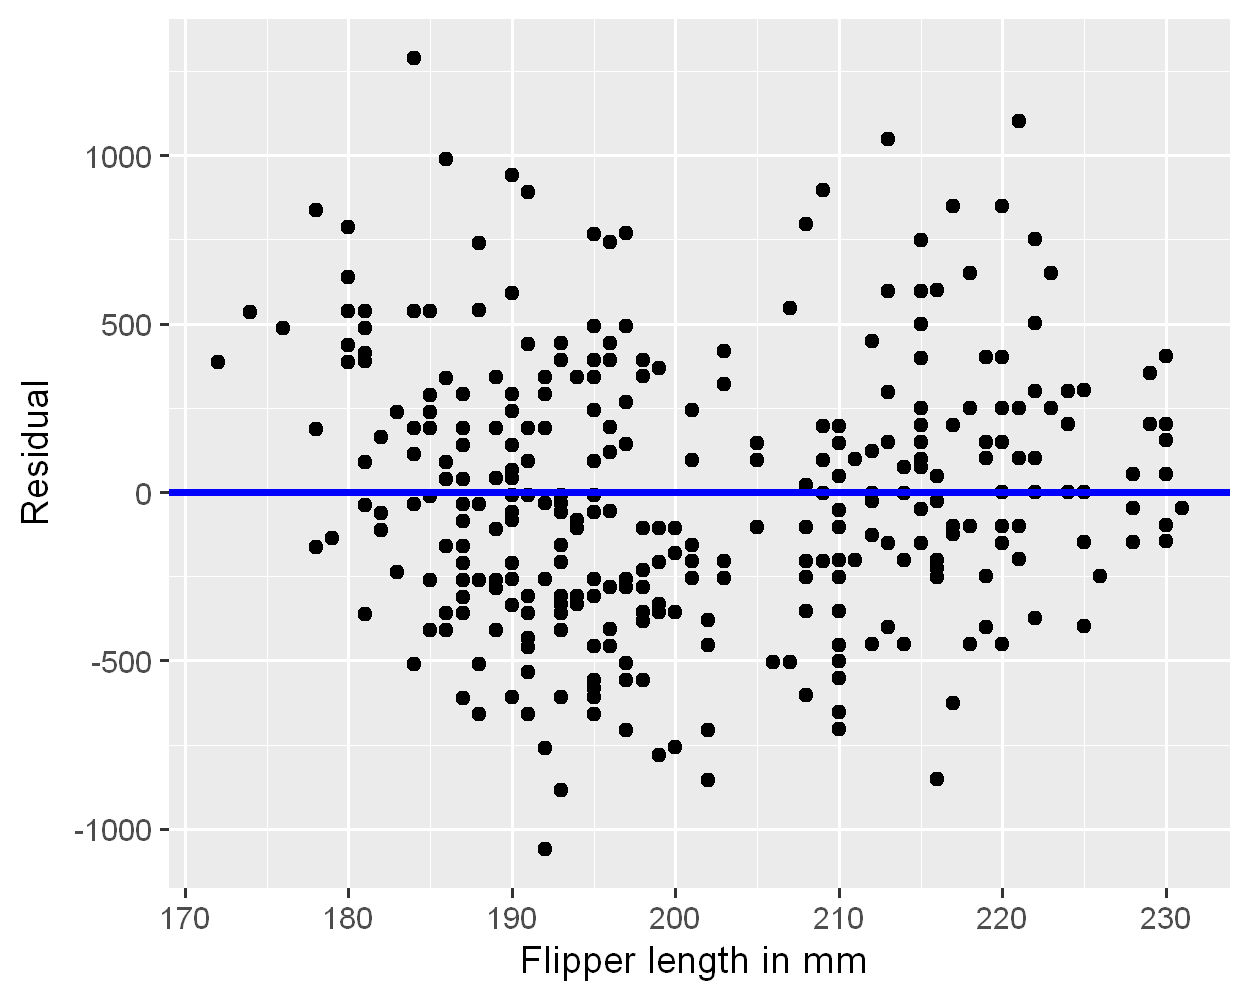

In [9]:
ggplot(regression_points, aes(x = flipper_length_mm, y = .resid)) +
  geom_point() +
  labs(x = "Flipper length in mm ", y = "Residual") +
  geom_hline(yintercept = 0, col = "blue", linewidth = 1)

**4d.** Does this model meet the Normality of Residuals condition?

**Answer:**

**Yes. While there are outliers, there is reasonably equal variance seen in the clusters.** 



***
## Question 5

Now let’s circle back and take a second look at the confidence
intervals. Using this bootstrap distribution, we’ll construct the 95%
confidence interval using the percentile method and (if appropriate) the
standard error method as well. We can compare our results to the results
from R (which uses mathematical formula to construct confidence
intervals.)

### Step 1: Calculate the bootstrap statistic and Visualize the bootstrap distribution

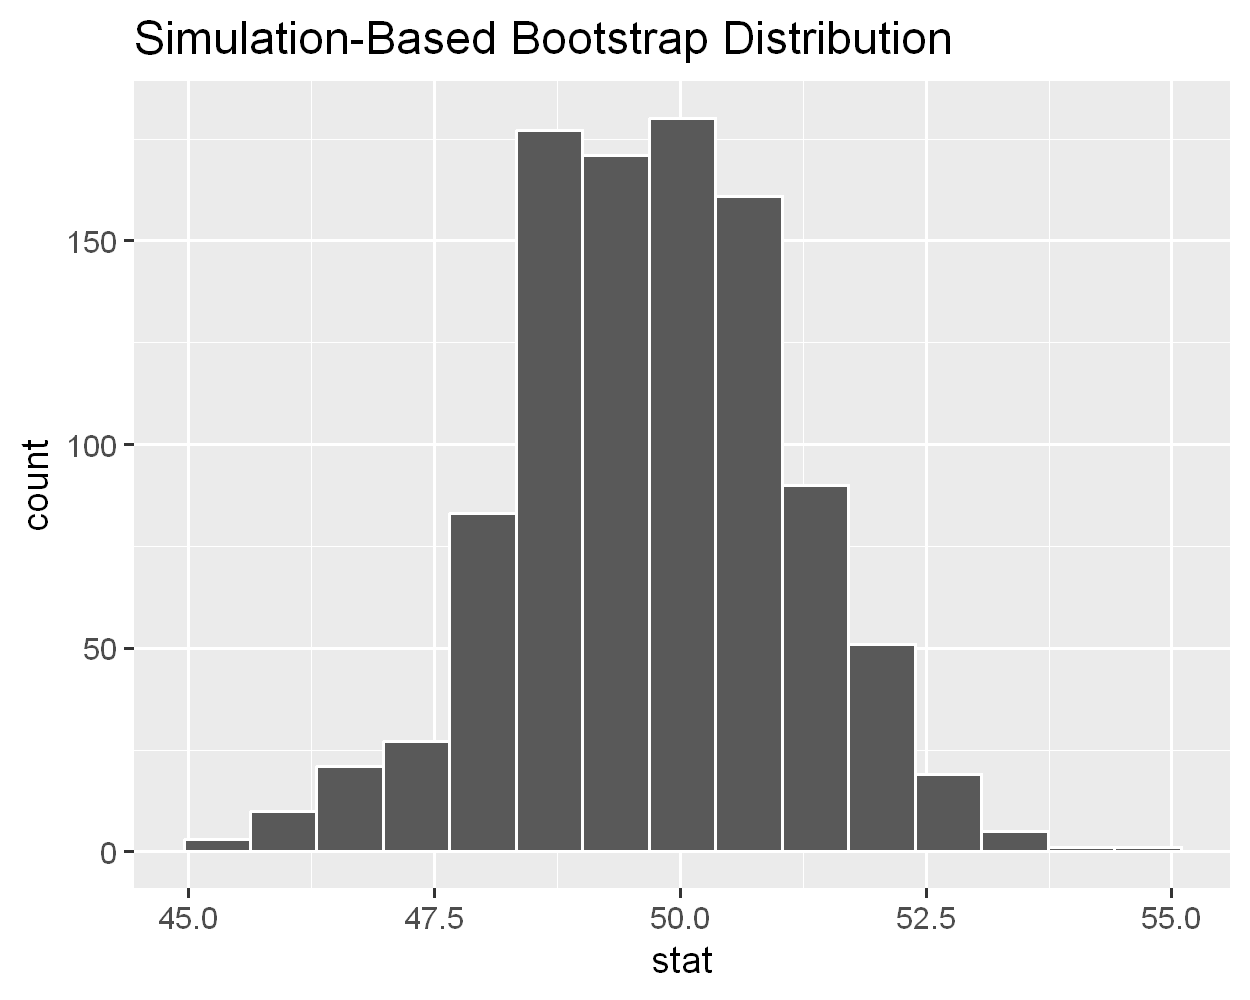

In [15]:
bootstrap_distn_slope = pen |> 
  specify(formula = body_mass_g ~ flipper_length_mm) |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "slope")

visualize(bootstrap_distn_slope)

### Step 2: Calculate CI from the a bootstap resample using the percentile method.

Find a 95% CI using percentile method:

In [16]:
#finish the code here:

 bootstrap_distn_slope |>
     summarize(
        lower_ci = quantile(stat, 0.025), 
        upper_ci = quantile(stat, 0.975)
        )

lower_ci,upper_ci
<dbl>,<dbl>
46.68378,52.39215


***
## Question 6

Write down the two 95% confidence intervals for the $\beta_{1}$. a, b,
c, and d with the appropriate values you’ve computed.

When you are done, make sure all the `|` in the table still line up so
your results print out in a table!

| CI construction method                | lower value | upper value |
|---------------------------------------|-------------|-------------|
| Using bootstrap: percentile rule      |46.83118      | 52.38546 |
| Using mathematical formula (see [above](#Create-a-linear-regression-model)) | 46.70949 | 	52.66164  |

In your opinion, would you say these three confidence intervals are
similar?

**Answers:**


**Yes. Both methods provide a range of plausible values for the slope of the regression line, and the overlap between the intervals suggests consistency in the results obtained through these two approaches. The percent difference is minimal and likely has to do with the bootstrap samples being different.**



## Part 2

For the next part you will check the conditions for regression inference
for a new model. This model will have `bill_length_mm` and `species` as
explanatory variables, and we’ll use the parallel slopes model

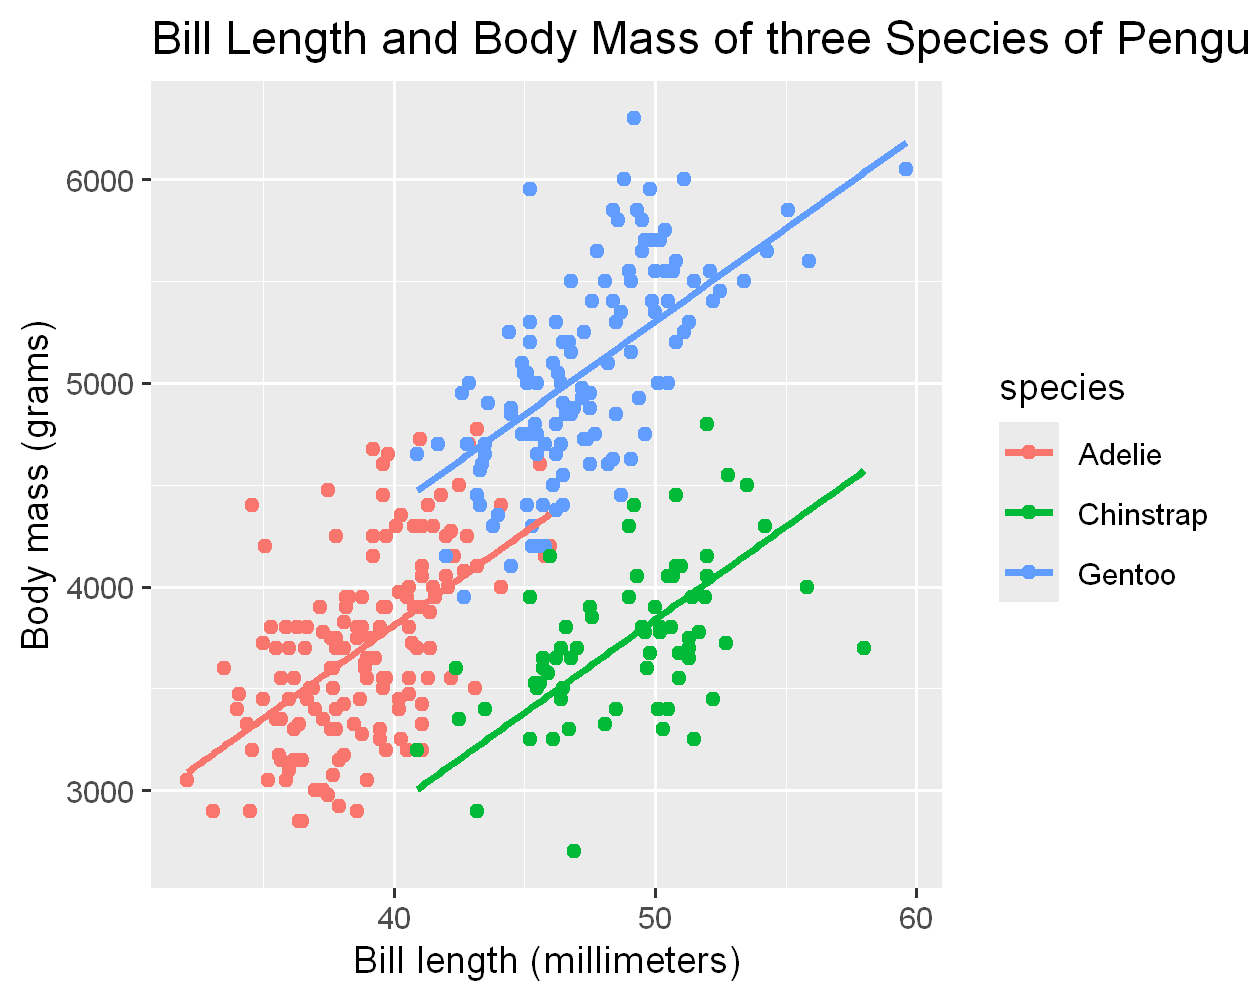

In [12]:
ggplot(data = pen, aes(y = body_mass_g, x = bill_length_mm, color=species)) + 
  geom_point() + 
  geom_parallel_slopes(se = FALSE) +
  labs(x = "Bill length (millimeters)", 
       y = "Body mass (grams)", 
       title = "Bill Length and Body Mass of three Species of Penguins") 

Let’s fit the parallel slopes model

In [26]:
# Fit regression model:

mod = linear_reg() |> set_engine('lm')

pen_parallel = mod |> fit(body_mass_g ~ bill_length_mm + species, data = pen)

# Get regression table:
tidy(pen_parallel)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),153.73969,268.901233,0.5717329,5.678829e-01
bill_length_mm,91.43582,6.887119,13.2763517,1.158990e-32
speciesChinstrap,-885.81208,88.250154,-10.0375131,6.373927e-21
speciesGentoo,578.62916,75.362341,7.6779617,1.756354e-13


Let us once again inspect the conditions necessary for inference with
regression.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

***
## Question 7

**Check for Linearity of relationship between variables **

Would you say that the relationship between `bill_length_mm` and
`body_mass_g` appears to be linear for each species?

**Answer:**

**Overall, yes. Both Adiele and Gentoo are reasonably linear. Chinstrap appears to have a steeper slope (unfit for parallel slopes) but it's not non-linear from appearance.**



**Check for Independence of the residuals **

This is the same as the first model that we looked it. The observations
in our data must be independent of one another. In this data, we can not
be sure this is case, for example, some of the penguins included may be
related (siblings, parents). We are not given enough information to
verify this condition has been met.

In [29]:
regression_points_parallel = augment(pen_parallel, new_data = pen)

regression_points_parallel |> head()

.pred,.resid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
3728.880,21.11981,Adelie,Torgersen,39.1,18.7,181,3750,male
3765.455,34.54548,Adelie,Torgersen,39.5,17.4,186,3800,female
3838.603,-588.60318,Adelie,Torgersen,40.3,18.0,195,3250,female
3509.434,-59.43423,Adelie,Torgersen,36.7,19.3,193,3450,female
3747.167,-97.16736,Adelie,Torgersen,39.3,20.6,190,3650,male
3710.593,-85.59303,Adelie,Torgersen,38.9,17.8,181,3625,female


***
## Question 8

Check Normality of the residuals (and they should be centered at 0.)

**8a) **

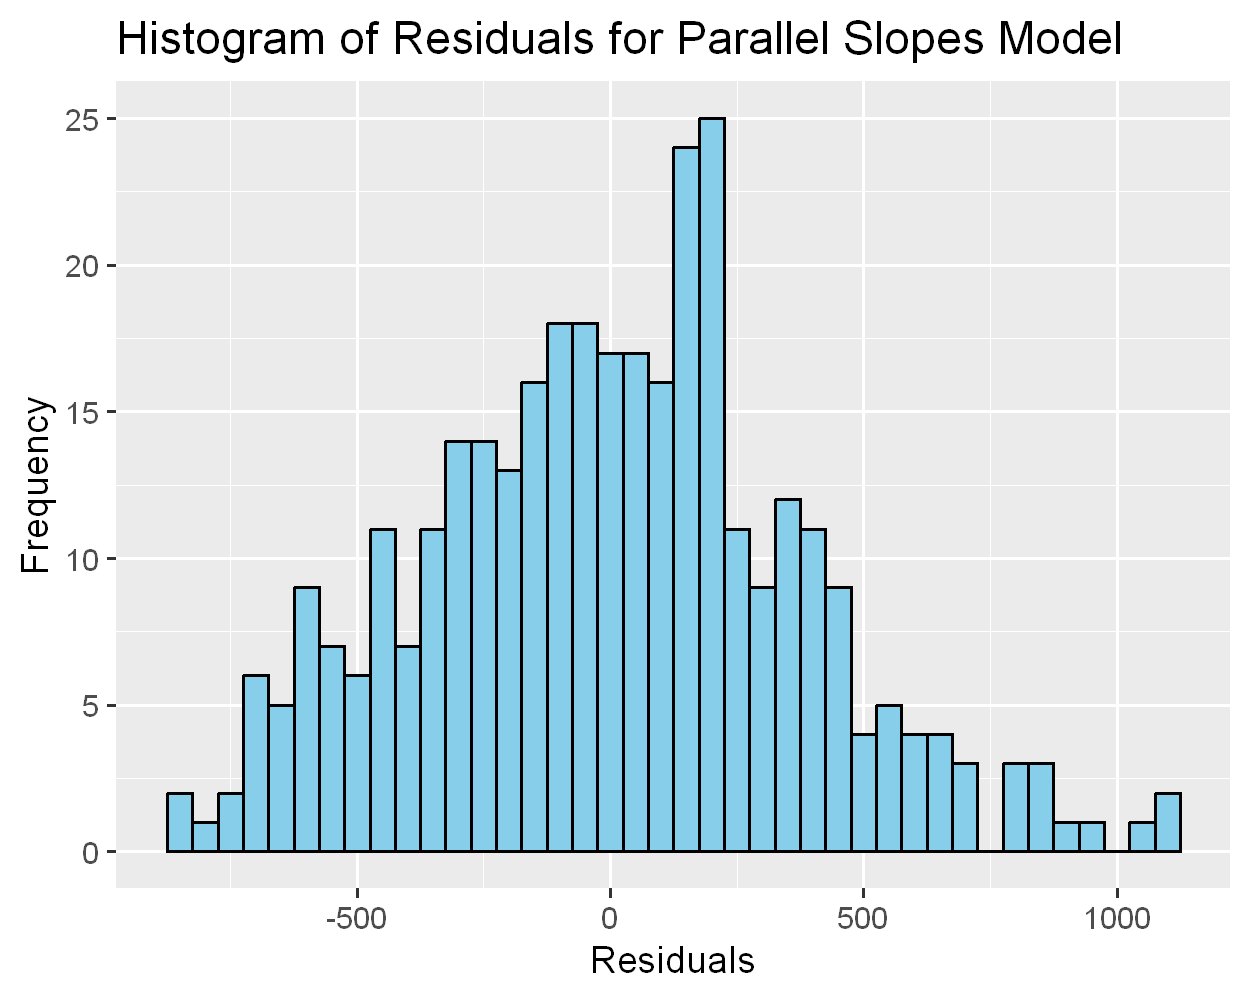

In [18]:
#Add code for the histogram:

ggplot(regression_points_parallel, aes(x = .resid)) +
    geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
    labs(x = "Residuals", y = "Frequency", title = "Histogram of Residuals for Parallel Slopes Model")


**8b)** Does this model meet the Normality of Residuals condition?

**Answer:**


**Yes, the histogram of residuals for the parallel slopes model appears to be reasonably distributed around 0. While there are an ample number of residuals around ~175-200, this spike isn't enough to say it's *NOT* centered around 0.**



***
## Question 9

Check for Equality of variance of the residuals

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis.

**9a)**

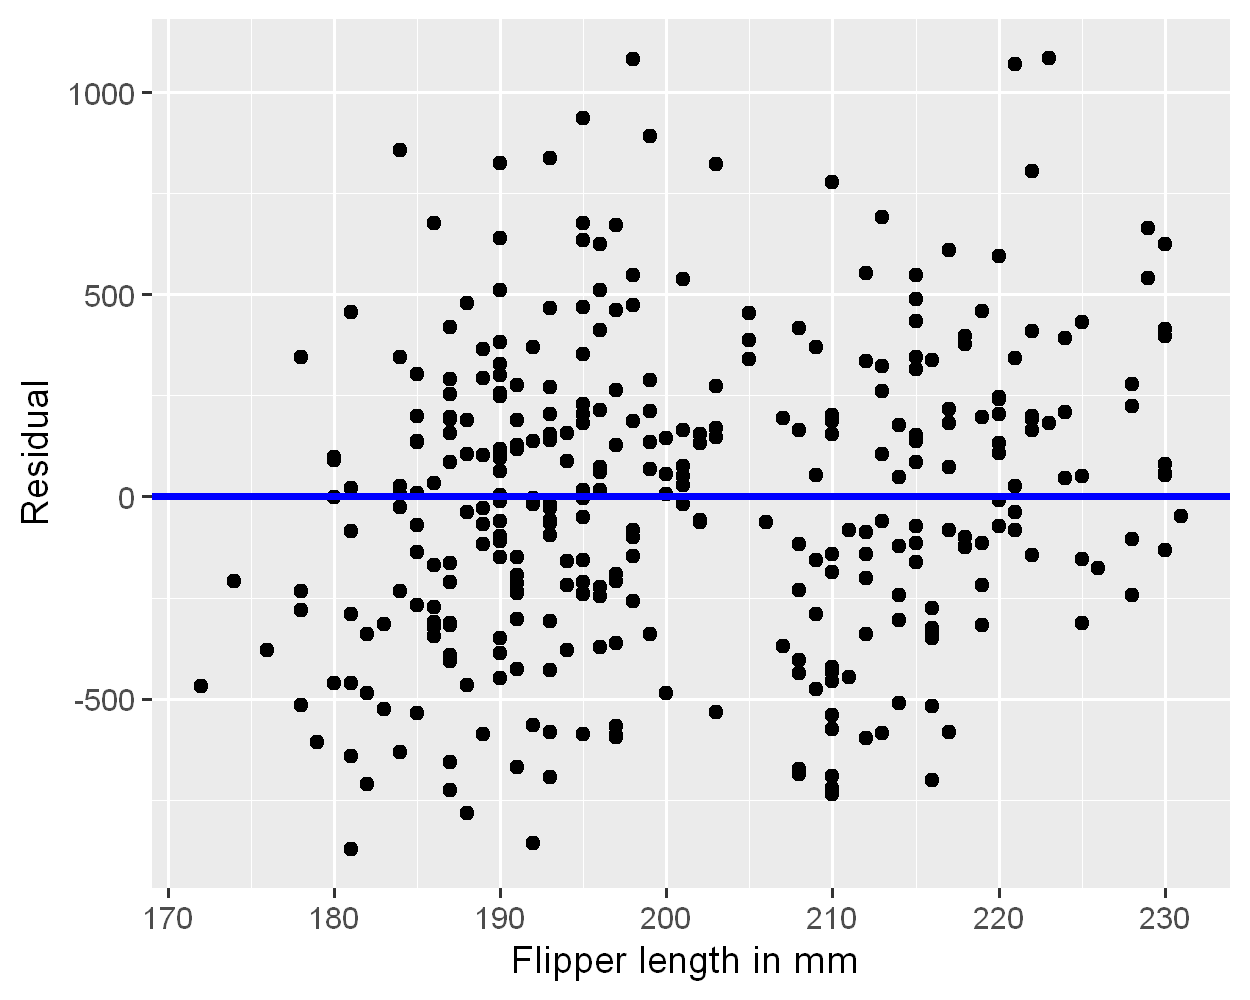

In [19]:
#Add code to check this condition:
ggplot(regression_points_parallel, aes(x = flipper_length_mm, y = .resid)) +
  geom_point() +
  labs(x = "Flipper length in mm ", y = "Residual") +
  geom_hline(yintercept = 0, col = "blue", linewidth = 1)

**9b) **Does this meet the equality of variance of the residuals
condition?

**Answer:**




**Yes, the scatterplot shows reasonably equal variance across the range of the explanatory variable. While there may be slight deviations, the residuals do not exhibit a clear pattern or funnel shape, indicating that the equality of variance condition is met.**


***
## Question 10

Run the code below to find the confidence intervals for our model's coefficients.

In [20]:
boots = bootstraps(pen, times = 1000, apparent = TRUE)

mod = linear_reg() |> set_engine('lm')

boot_models  = boots |> 
  mutate(model = map(splits, ~mod |> fit(body_mass_g ~ bill_length_mm + species, data = as_tibble(.x))),
         coef_info = map(model, tidy))

boot_coefs = boot_models |> 
  unnest(coef_info)

percentile_intervals = int_pctl(boot_models, coef_info)

percentile_intervals

term,.lower,.estimate,.upper,.alpha,.method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-377.53186,145.25437,627.1757,0.05,percentile
bill_length_mm,79.77562,91.67583,105.3528,0.05,percentile
speciesChinstrap,-1044.81392,-890.28956,-744.1443,0.05,percentile
speciesGentoo,431.43450,575.11824,712.4834,0.05,percentile


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


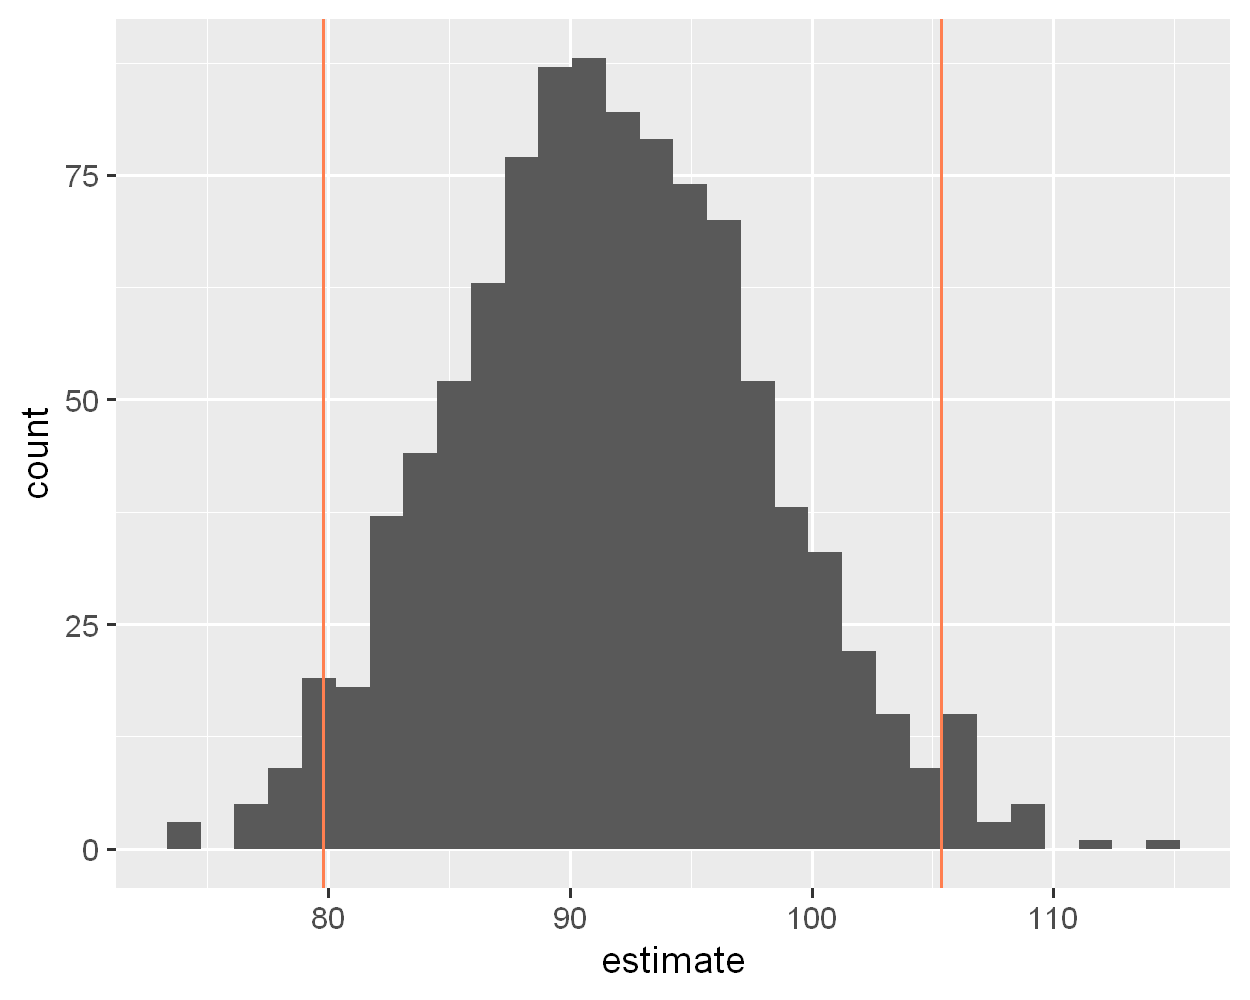

In [21]:
boot_coefs |> 
    filter(term == 'bill_length_mm') |>
ggplot(aes(x = estimate)) +
    geom_histogram() +
    geom_vline(xintercept = percentile_intervals |> filter(term == 'bill_length_mm') |> pull(.lower), color = 'coral') +
    geom_vline(xintercept = percentile_intervals |> filter(term == 'bill_length_mm') |> pull(.upper), color = 'coral')

What can we conclude about the relationship between bill length and body
mass?

**Answer:**


**The confidence intervals for the coefficient of `bill_length_mm` do not include 0, which indicates that there is a statistically significant relationship between bill length and body mass. This suggests that as the bill length increases, the body mass also tends to increase, holding species constant. The histogram of bootstrap estimates further supports this conclusion, as the distribution of estimates is centered away from 0.**

***
## Further Testing

### 2. Independence of the Residuals
#### Durbin Watson Statistic

The Durbin Watson statistic is a test statistic used in statistics to detect autocorrelation in the residuals from a regression analysis. The Durbin Watson statistic will always assume a value between 0 and 4. A value of DW = 2 indicates that there is no autocorrelation.

The DW test is named after James Durbin and Geoffrey Watson who first used the technique in the 50's. In statistics, the autocorrelation of a random process is the Pearson correlation between values of the process at different times, as a function of the two times or of the time lag. The Durbin-Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis. The DW test statistic is calculated using the following equation <a href=https://medium.com/@cdefaux/using-the-durbin-watson-dw-test-for-time-series-data-b87bd884fbbd>[1]</a>:

$$
d = \frac{\sum_{t=2}^{T} (e_t - e_{t-1})^2}{\sum_{t=1}^{T} e_t^2}
$$

where T is the total number of observations and e is the residual error.

The hypotheses for the Durbin Watson test are:
- H0 = no first order autocorrelation (rho = 0)
- H1 = first order autocorrelation exists (rho != 0)

The Durbin-Watson test gives values that are between 0 and 4 with the following meaning:

- 2 is no autocorrelation.
- 0 to <2 is positive autocorrelation (common in time series data).
- 2 to 4 is negative autocorrelation (less common in time series data).

In [ ]:
# Changed path due to dependency issues
#.libPaths()

In [20]:
# load Durbin-Watson test
library(lmtest)

In [23]:
# Refit the models using the lm function
pen_model_lm = lm(body_mass_g ~ flipper_length_mm, data = pen)
pen_parallel_lm = lm(body_mass_g ~ bill_length_mm + species, data = pen)

# Perform the Durbin-Watson test
dwtest(pen_model_lm)
dwtest(pen_parallel_lm)


	Durbin-Watson test

data:  pen_model_lm
DW = 2.1896, p-value = 0.9572
alternative hypothesis: true autocorrelation is greater than 0



	Durbin-Watson test

data:  pen_parallel_lm
DW = 2.4958, p-value = 1
alternative hypothesis: true autocorrelation is greater than 0


#### Speculation:

While I was the one that looked this up, I don't necessarily understand it. I just thought it was weird there was no way to check for independence other than observationally. 

Accoring to the test, both are reasonably close to two, however they are negatively autocorrelated. A quick search on what this means:

**DW > 2 = Negative autocorrelation (residuals alternate in sign frequently).**
- Residuals tend to switch signs frequently (e.g., positive, negative, positive, negative).
- **Over-correction** in errors: If one error is positive, the next is likely negative.
- Can indicate **oscillatory patterns** in data, which might suggest model misspecification.

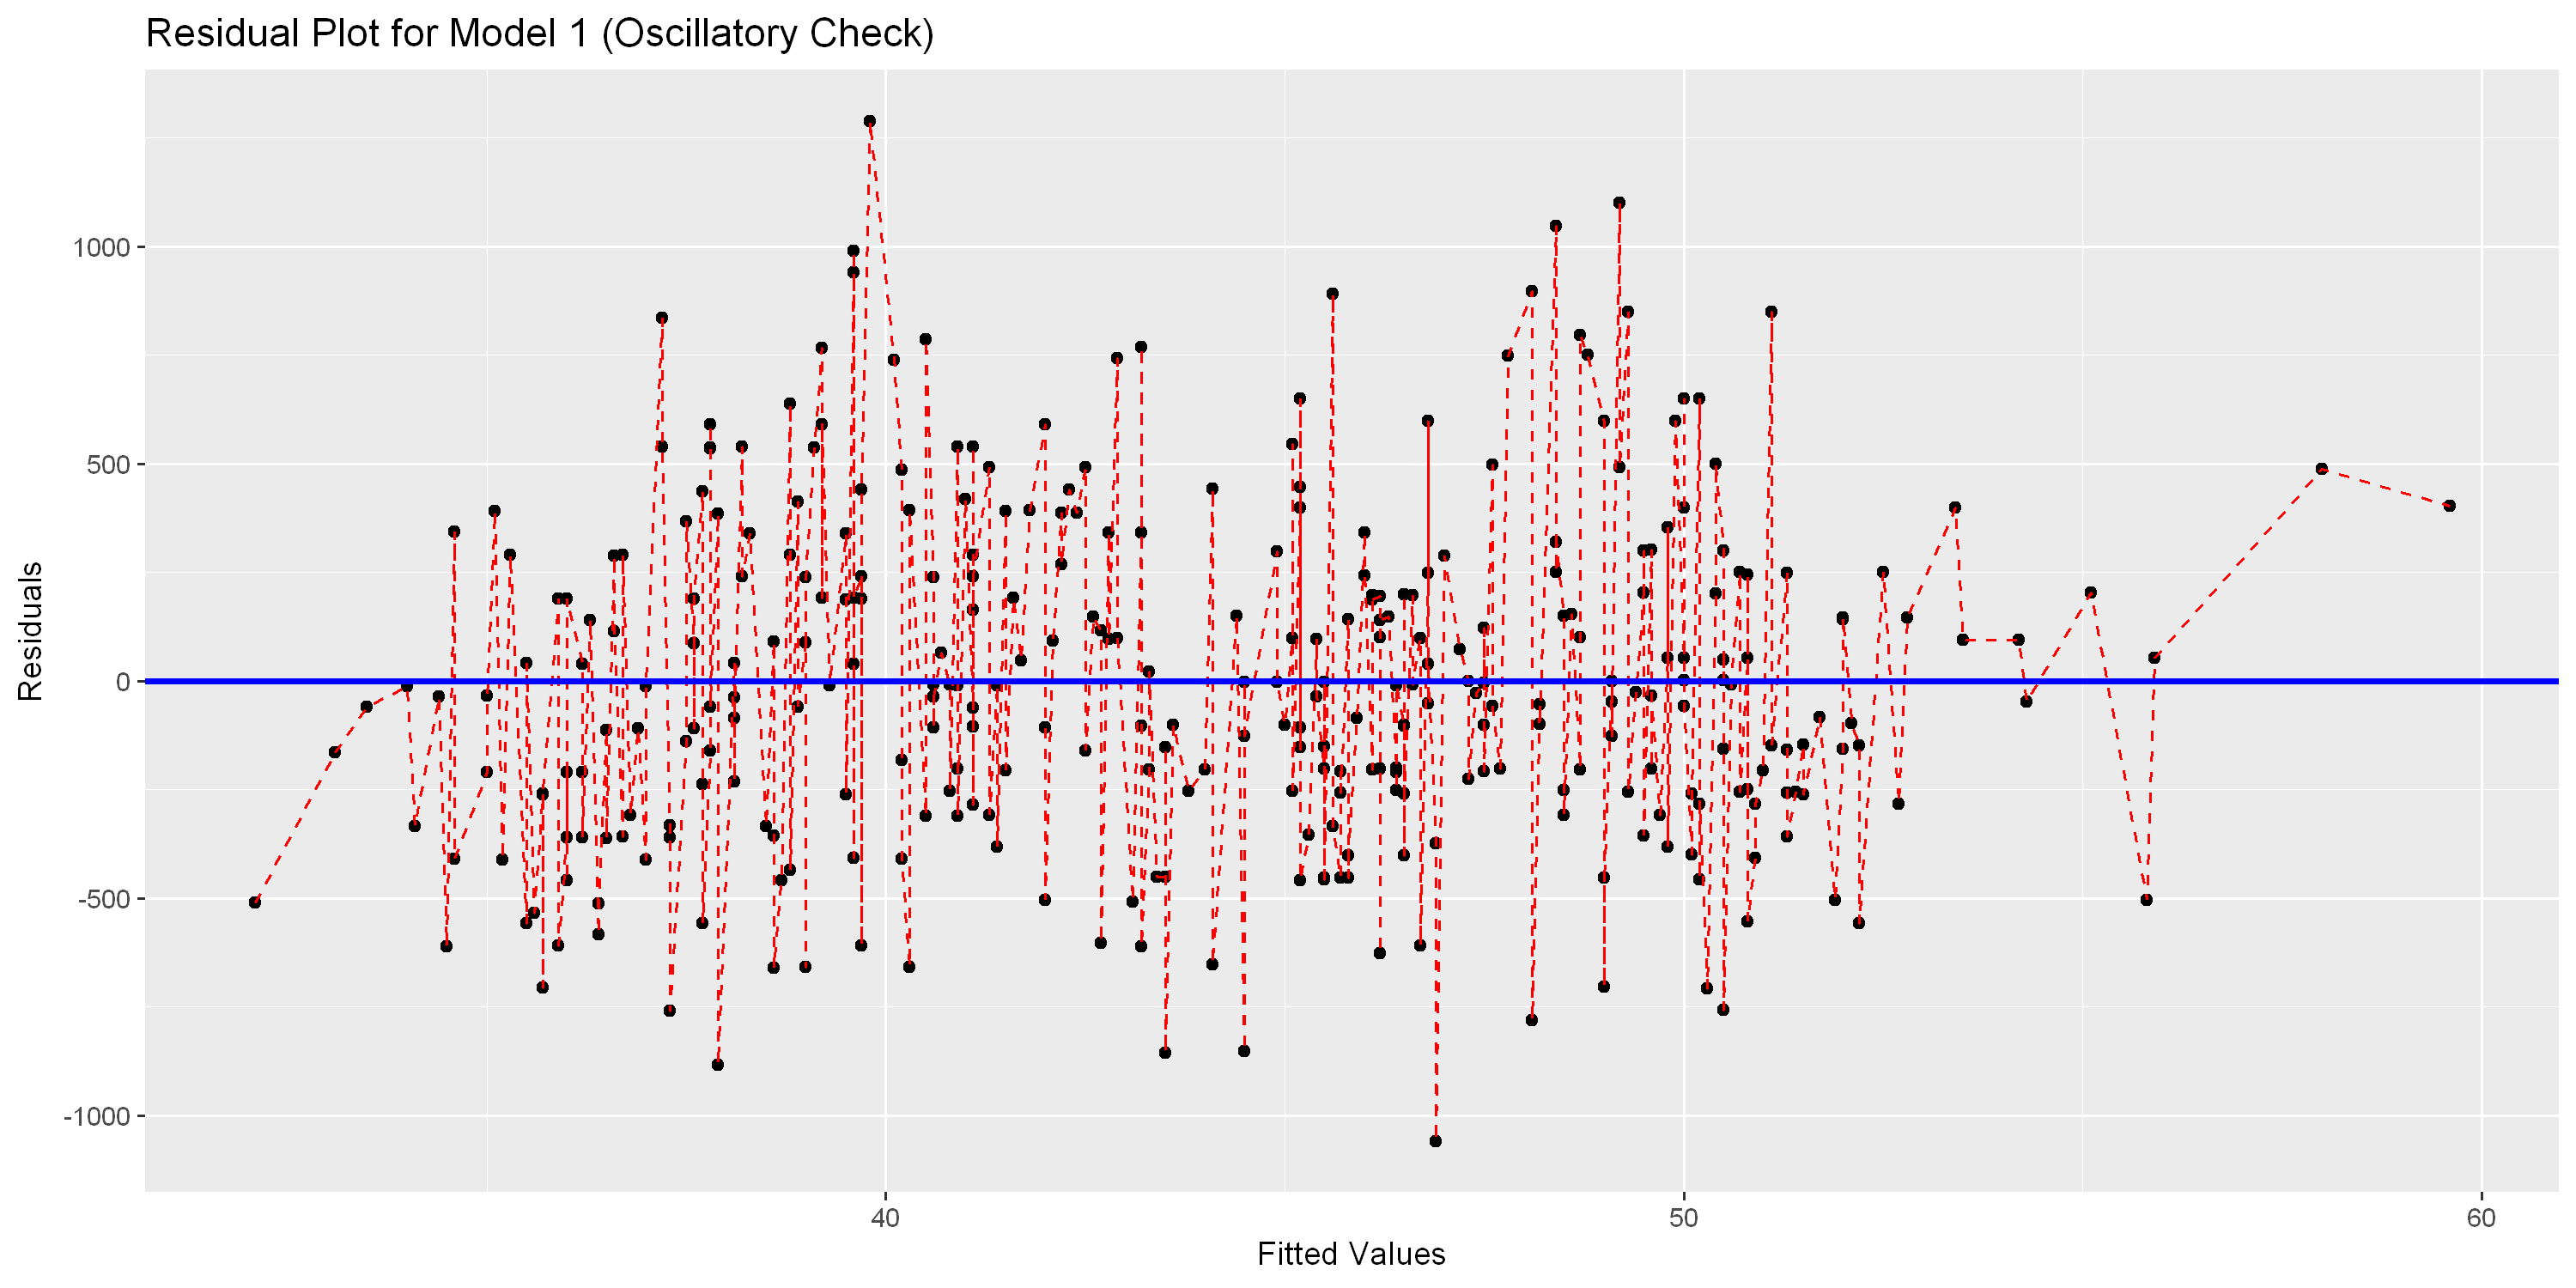

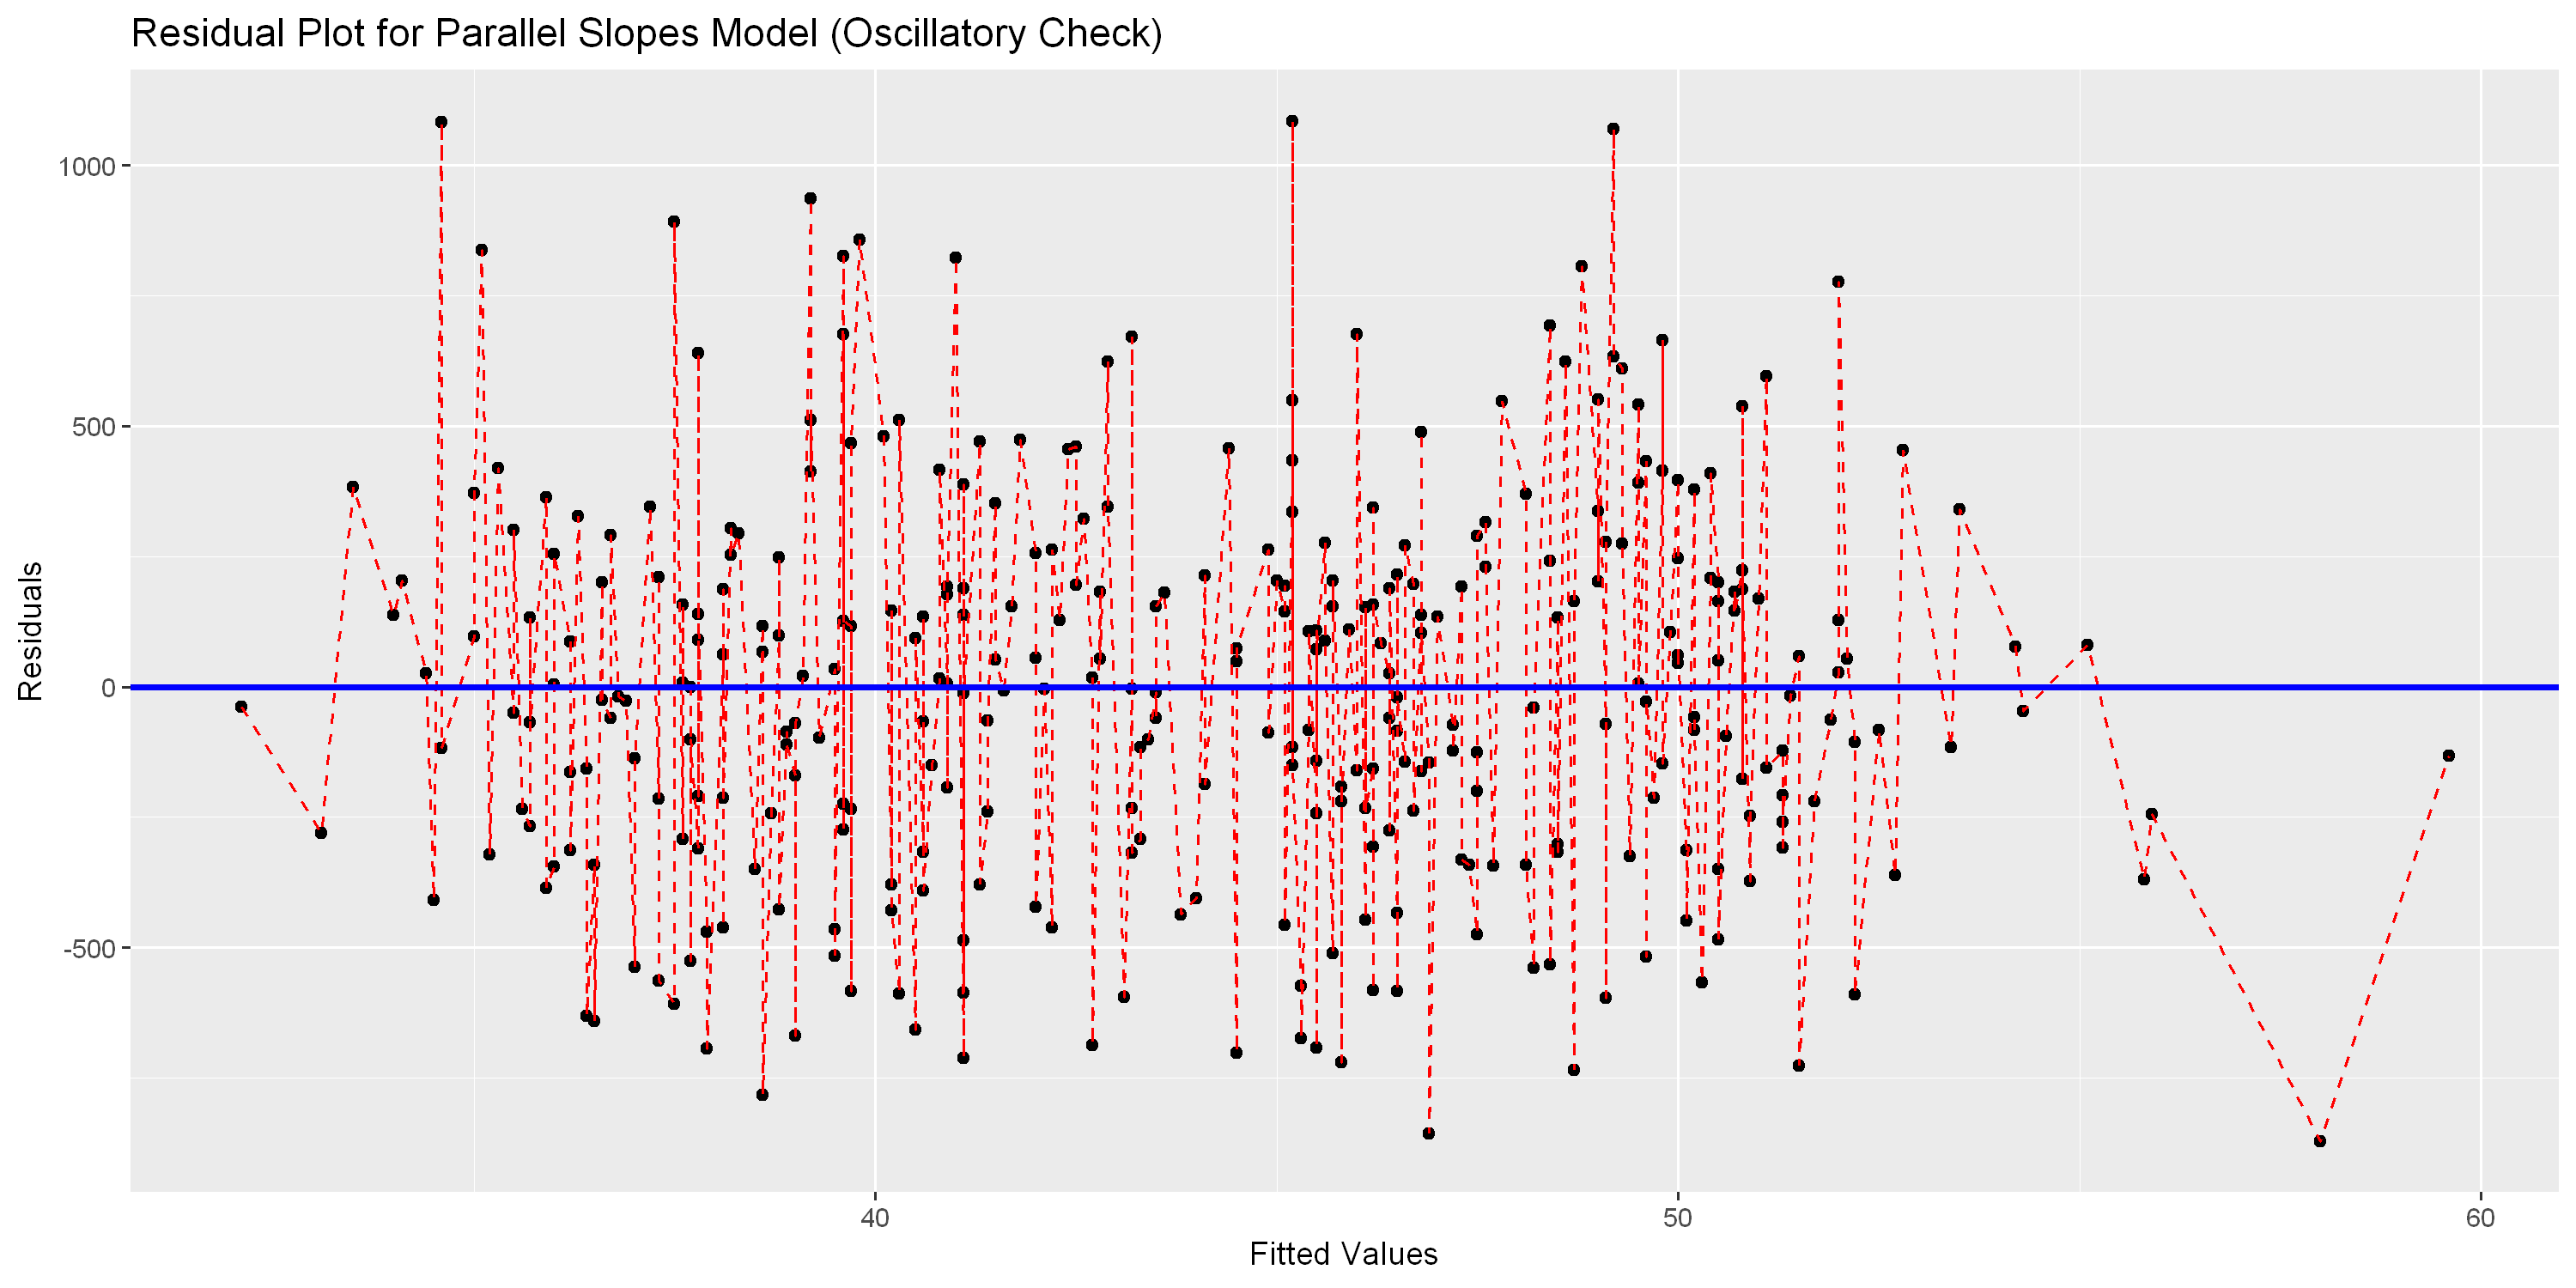

In [33]:
# Set plot size
options(repr.plot.width = 12, repr.plot.height = 6)

# Residual plot for the first model with oscillatory behavior check
ggplot(data = regression_points, aes(x = bill_length_mm, y = .resid)) +
    geom_point() +
    geom_line(aes(group = 1), color = "red", linetype = "dashed") +
    geom_hline(yintercept = 0, col = "blue", linewidth = 1) +
    labs(x = "Fitted Values", y = "Residuals", title = "Residual Plot for Model 1 (Oscillatory Check)")

# Residual plot for the parallel slopes model with oscillatory behavior check
ggplot(data = regression_points_parallel, aes(x = bill_length_mm, y = .resid)) +
    geom_point() +
    geom_line(aes(group = 1), color = "red", linetype = "dashed") +
    geom_hline(yintercept = 0, col = "blue", linewidth = 1) +
    labs(x = "Fitted Values", y = "Residuals", title = "Residual Plot for Parallel Slopes Model (Oscillatory Check)")